In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%load_ext autoreload
%autoreload 2

In [76]:
from plotting import *

In [19]:
dataDir = "."

In [20]:
list_of_runs = []
# If list is empty, all runs of the following experiment will be loaded
experimentName='expr2'

In [21]:
M = 4

### If list of runs is empty, load all runs from [experimentName]

In [22]:
if len(list_of_runs)==0:
    for folder in listdir(dataDir):
#        if experimentName=='LongRun' and 'v2' in folder:
#            continue
        if folder.split('-')[0]==experimentName:
            list_of_runs.append(folder)

### Load listed runs

In [23]:
loss_results, acc_results = load_list_of_runs(list_of_runs)

Loading run logs:
----------------
expr2-0.001-0.0-False
expr2-0.001-0.0-True
expr2-0.001-0.15-False
expr2-0.001-0.15-True
expr2-0.001-0.3-False
expr2-0.001-0.3-True
expr2-0.001-0.45-False
expr2-0.001-0.45-True
expr2-0.001-0.6-False
expr2-0.001-0.6-True
expr2-0.001-0.75-False
expr2-0.001-0.75-True
expr2-0.001-0.9-False
expr2-0.001-0.9-True
expr2-0.0025-0.0-False
expr2-0.0025-0.0-True
expr2-0.0025-0.15-False
expr2-0.0025-0.15-True
expr2-0.0025-0.3-False
expr2-0.0025-0.3-True
expr2-0.0025-0.45-False
expr2-0.0025-0.45-True
expr2-0.0025-0.6-False
expr2-0.0025-0.6-True
expr2-0.0025-0.75-False
expr2-0.0025-0.75-True
expr2-0.0025-0.9-False
expr2-0.0025-0.9-True
expr2-0.005-0.0-False
expr2-0.005-0.0-True
expr2-0.005-0.15-False
expr2-0.005-0.15-True
expr2-0.005-0.3-False
expr2-0.005-0.3-True
expr2-0.005-0.45-False
expr2-0.005-0.45-True
expr2-0.005-0.6-False
expr2-0.005-0.6-True
expr2-0.005-0.75-False
expr2-0.005-0.75-True
expr2-0.005-0.9-False
expr2-0.005-0.9-True
expr2-0.01-0.0-False
expr2-0.0

## Enter batch time averages here

In [25]:
SYNC_SECONDS_PER_BATCH = 2.4

ASYNC_SECONDS_PER_BATCH = 2.0

## Overview of all smoothed curves 

In [38]:
marker_dict = {'0.0005':'s', '0.001':'o', '0.005':'v'}
marker_dict = {'0.0005':'s', '0.001':'o', '0.0025':'+', '0.005':'v', '0.01':'D', '0.025':'.', '0.05':'*', '0.1':'^'}

In [84]:
WINDOW = 100

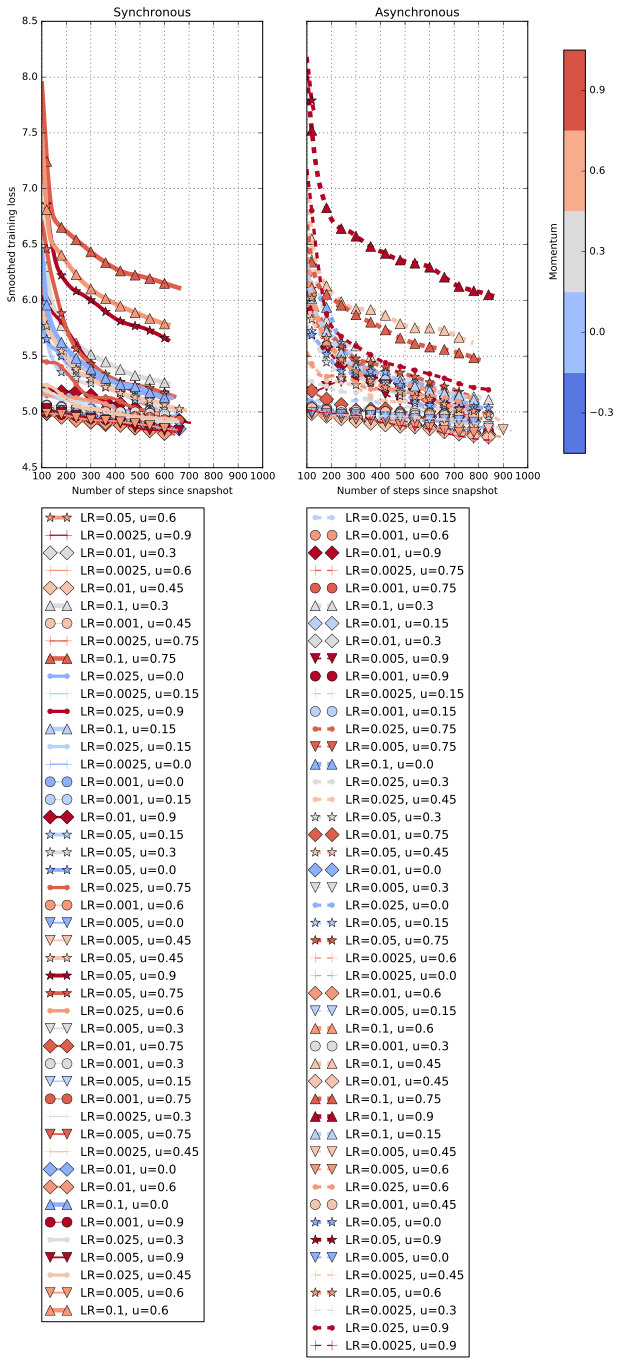

In [85]:
f = plot_all_runs(loss_results, window=WINDOW, two_panels=True, marker_dict=marker_dict, mark_every=60)
                    #axis=[None, None, 5.15, 5.35])

## Parameter space loss contours 

[5.0128096616000004, 4.8169237628000001, 4.8414409323000003, 4.8949919024000001, 4.8345678828000009, 5.2537130130999996, 4.9637811627000001, 4.8771603644999999, 6.1111440305000011, 4.9766232455000008, 4.9733555161000007, 5.1191536695000002, 5.1325411021000011, 4.9139008097000003, 4.9578757665000008, 5.0212772195999991, 5.0104747732000003, 4.9030303303000009, 5.1400311595000003, 5.0158620873999995, 5.1778107922000007, 4.9407494972000006, 4.9440084832999993, 4.9145021212, 4.8836511093000006, 5.0158908347000004, 5.6446878166000003, 5.1374022875999996, 4.9922185310000007, 4.9052283364000004, 4.7981429677000005, 4.9788677492, 4.9035146207000002, 4.9248256731, 4.9531184549000002, 4.8230789415000004, 4.9447819922999994, 4.8426643104, 4.7983802468999999, 5.1258522219000007, 4.8636691907000005, 4.9111393173, 4.8322837717000002, 4.9304214782000004, 4.8400583491000004, 5.7808620901000003]
4.7981429677


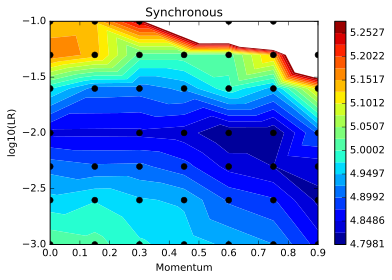

In [86]:
plot_loss_contour(loss_results, window=WINDOW, sync=True)

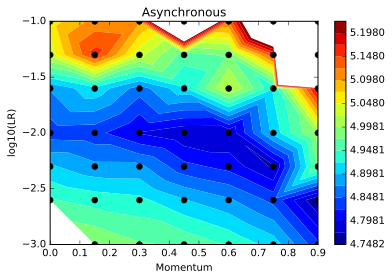

In [95]:
plot_loss_contour(loss_results, window=WINDOW, sync=False)

## Only plot the best run for each momentum value in each mode 

In [96]:
dict_of_winners = get_best_for_each_momentum(loss_results,WINDOW)

### DASHED = ASYNC
### SOLID = SYNC

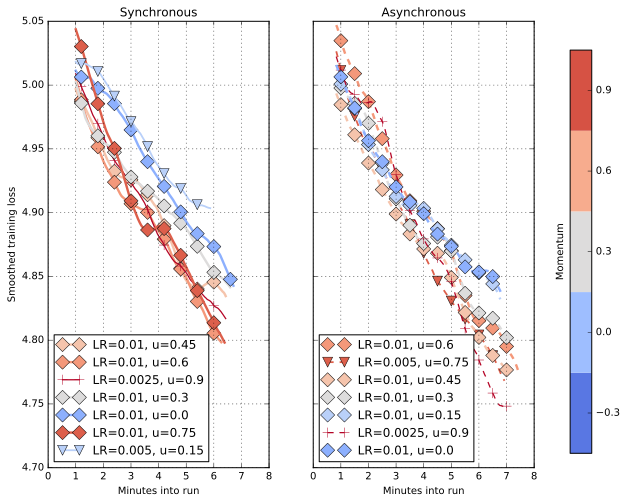

In [107]:
f = plot_all_runs(dict_of_winners, window=WINDOW, two_panels=True, marker_dict=marker_dict, mark_every=60,
                 sync_seconds_per_batch=SYNC_SECONDS_PER_BATCH, async_seconds_per_batch=ASYNC_SECONDS_PER_BATCH,
                 CG=M)

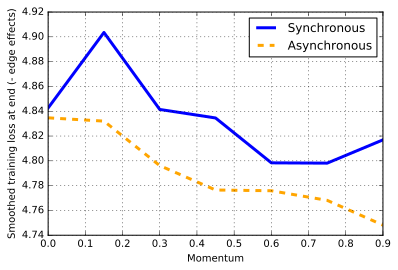

In [106]:
f=plot_momentum_dependence(loss_results, WINDOW)

## Plot winning curves along with evaluation loss level 

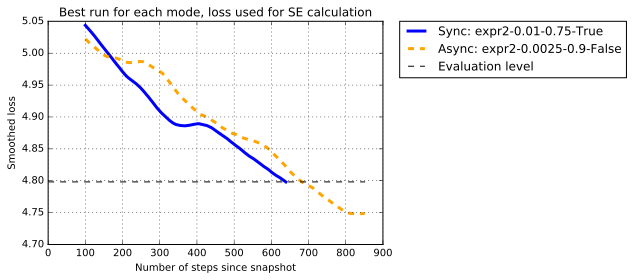

In [102]:
f=plot_se_calculation(loss_results, WINDOW)

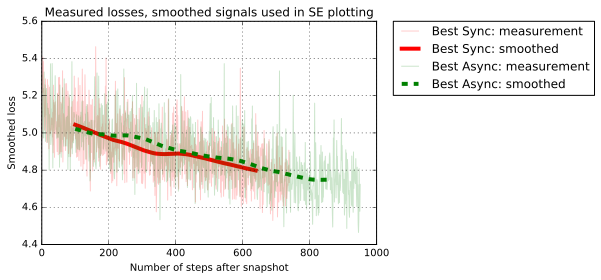

In [103]:
f=plot_winners_snr(loss_results, WINDOW)

# Plot HE-SE

plotting.py:264: RuntimeWarning: invalid value encountered in less_equal
  async_meets_target = np.argmax(a <= target)
plotting.py:265: RuntimeWarning: invalid value encountered in less_equal
  sync_meets_target = np.argmax(s <= target)


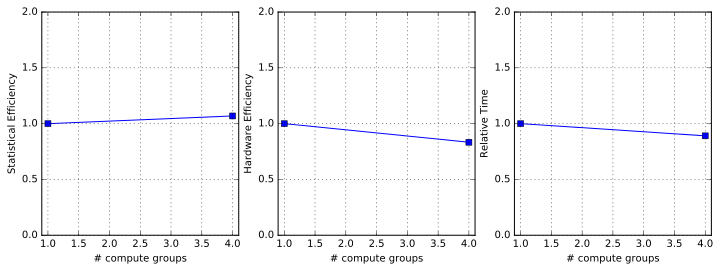

In [108]:
f = plot_se_he(loss_results, WINDOW, M, SYNC_SECONDS_PER_BATCH, ASYNC_SECONDS_PER_BATCH)

In [109]:
f.savefig('experiment2-se-he.png', bbox_inches='tight', pad_inches=0.1)

In [25]:
from IPython.display import HTML

if False:
    HTML('''<script>
    code_show=true; 
    function code_toggle() {
     if (code_show){
     $('div.input').hide();
     } else {
     $('div.input').show();
     }
     code_show = !code_show
    } 
    $( document ).ready(code_toggle);
    </script>
    <form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')